<a href="https://colab.research.google.com/github/manu675/analytics_cup_21/blob/main/AC_python_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Analytics - Analytics Cup 21

In [ ]:
# importing libaries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [ ]:
## Way 2: uploading the local data to google colab
# importing local data to google colab:
from google.colab import files
uploaded = files.upload()


Saving df.csv to df.csv


Preprocessing

In [ ]:
df = pd.read_csv('df.csv')


In [ ]:
df.head()

,Physician_ID,set,City,State,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,Total_Payments,Ownership_Payments_Count,Ownership_Interest
0,1,train,FORT PIERCE,FL,Allopathic & Osteopathic Physicians|Obstetrics...,FL,NaN,NaN,NaN,NaN,952.93,0,False
1,2,train,TOWSON,MD,Allopathic & Osteopathic Physicians|Anesthesio...,MD,NaN,NaN,NaN,NaN,120924.92,0,False
2,3,train,TROY,NY,Podiatric Medicine & Surgery Service Providers...,NY,NaN,NaN,NaN,NaN,3523.93,0,False
3,4,train,SAVANNAH,GA,Allopathic & Osteopathic Physicians|Internal M...,GA,SC,AL,NaN,NaN,26745.61,0,False
4,5,train,ALBUQUERQUE,NM,Allopathic & Osteopathic Physicians|Orthopaedi...,NM,NaN,NaN,NaN,NaN,25411.21,0,False


In [ ]:
df.columns

Index(['Physician_ID', 'set', 'City', 'State', 'Primary_Specialty',
       'License_State_1', 'License_State_2', 'License_State_3',
       'License_State_4', 'License_State_5', 'Total_Payments',
       'Ownership_Payments_Count', 'Ownership_Interest'],
      dtype='object')

In [ ]:
# dimensionality of the df
df.shape

(6000, 13)

In [ ]:
# frequency table
df["set"].value_counts()

train    5000
test     1000
Name: set, dtype: int64

In [ ]:
# frequency table
df["Ownership_Interest"].value_counts()

False    5700
True      300
Name: Ownership_Interest, dtype: int64

In [ ]:
# frequency table
df["Ownership_Payments_Count"].value_counts()

0     5700
1      141
2       33
3       19
4       14
5       10
8        5
12       5
14       5
13       5
9        4
15       4
27       4
7        3
19       3
29       3
22       3
20       3
16       3
10       3
6        2
49       2
18       2
11       2
76       1
63       1
59       1
43       1
39       1
31       1
24       1
32       1
36       1
44       1
88       1
75       1
92       1
23       1
62       1
38       1
21       1
25       1
34       1
33       1
41       1
79       1
Name: Ownership_Payments_Count, dtype: int64

In [ ]:
# labels
y = df["Ownership_Interest"]

In [ ]:
# features
X = df[["Total_Payments","Ownership_Payments_Count"]]

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


print(X_train, X_test, y_train, y_test)

      Total_Payments  Ownership_Payments_Count
4936         1772.44                         0
761        385412.14                         0
4281         1079.72                         0
5579         1059.93                         0
3653         3109.37                         0
...              ...                       ...
5218         2482.61                         0
4060        56451.20                         0
1346         2515.78                         0
3454        16871.12                         0
3582         2384.75                         0

[4500 rows x 2 columns]       Total_Payments  Ownership_Payments_Count
1201         2239.42                         0
1084        13015.36                         0
2060         1008.71                         0
248          4687.75                         0
5603         1985.97                         0
...              ...                       ...
990          1505.27                         1
134          1617.50               

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4500, 2), (1500, 2), (4500,), (1500,))

In [ ]:
X_train.head()

,Total_Payments,Ownership_Payments_Count
4936,1772.44,0
761,385412.14,0
4281,1079.72,0
5579,1059.93,0
3653,3109.37,0


In [ ]:
y_train.head()

4936    False
761     False
4281    False
5579    False
3653    False
Name: Ownership_Interest, dtype: bool

XGB Boosting Classifier

In [ ]:
# initilizing the XGBClassifier as an object: (using all the default hyperparameters)
xgbc = xgb.XGBClassifier()



In [ ]:
# fitting the XGB classifier model to the training data
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

When to use which splitting strategy:

Generally, k-fold cross validation is the gold-standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10.  
Use stratified cross validation to enforce class distributions when there are a large number of classes or an imbalance in instances for each class.

In [ ]:
# k-fold CV
##kfold = KFold(n_splits=5, shuffle=True) 

In [1]:
# stratified k-fold CV (due to imbalancanced data set) -> ratio of instances per class is maintained for each fold
skfold = StratifiedKFold(n_splits=5, shuffle=True)

NameError: ignored

In [ ]:
# estimator = xgbc is the xgb classifier model; "cv" determines the cross validation splitting strategy
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=skfold)
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


K-fold CV average score: 1.00


In [ ]:
# making predictions using the test data
y_pred = xgbc.predict(X_test)


In [ ]:
y_pred.shape

(1500,)

In [ ]:
# unique values (of a numpy array) of the predictions
np.unique(y_pred, return_counts=True)


(array([False,  True]), array([1422,   78]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([False,  True]), array([1422,   78]))

In [ ]:
# evaluation the predicted classifications using a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[1422,    0],
       [   0,   78]])

In [ ]:
# computing an accuracy score for the predictions (evaluating predictions)
accuracy_score(y_test, y_pred)

1.0

Balanced Accuracy Score:  
$ BAC = \frac{Recall + Specificity}{2}$

In [ ]:
# computing the balanced accuray score
balanced_accuracy_score(y_test, y_pred)

1.0

In [ ]:
# feature scores
xgbc.get_booster().get_fscore()

{'Ownership_Payments_Count': 71, 'Total_Payments': 25}

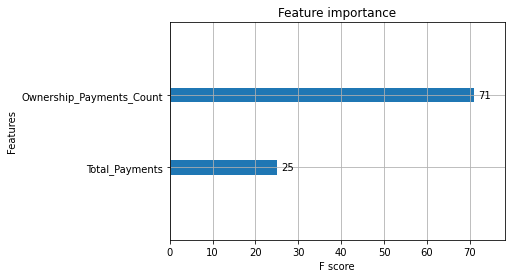

In [ ]:
# feature importance plot
xgb.plot_importance(xgbc)
plt.rcParams['figure.figsize'] = [12, 12]
plt.show()